In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# flist = matplotlib.font_manager.get_fontconfig_fonts()
# # names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# for font_file in flist:
#     if 'imbus' in font_file:
#         print(font_file)
#         matplotlib.font_manager.fontManager.addfont(font_file)
# print(flist)
# plt.style.use('presentation')
# print([x for x in flist if 'imbus' in x])

font = {'family' : 'Nimbus Roman',
        'size'   : 40}
        # 'weight' : 'bold',
        

# matplotlib.rc('font', **font)
print(plt.rcParams.keys())
params = {'font.size': 20, 'font.family': 'serif'}  # : 'sans-serif', 'font.sans-serif':

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# from matplotlib.pyplot import rcParams
# print(rcParams['font.family'])
# print(rcParams['font.size'])
# rcParams['font.family'] = 'Nimbus Roman'
# rcParams['font.serif'] = 'Nimbus Roman'
plt.rcParams.update(params)
# rcParams['lines.linewidth'] = 2
# rc('font',**{'family':'serif','serif':['NimbusRoman']})

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

figure_formats = ['eps', 'pdf', 'svg', 'png']

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

## Plotting DBSCAN results

In [2]:
with open('../results/results-dbscan.h5', 'rb') as file:
    (performance_dbscan, highest_f1) = pickle.load(file)

In [3]:
message_size_stateless = [24376, 32496, 42646, 54827, 62947, 73097, 83247, 93397, 103547,
113697, 123847, 133997, 174592, 215197]
avg_response_time_stateless = [0.0004,
        0.0003, 0.0021, 0.0017, 0.022,
        0.3458, 1., 1.0016, 1.0193, 1.2576, 2., 2.0125,
        3.38812, 5.18]
std_response_time_stateless = [0.02449,
        0.0223, 0.04995, 0.04579, 0.148,
        0.4768, 0.04689, 0.4469, 0.1706, 0.4391, 0.4344, 0.11377,
        0.709, 0.3952]

In [4]:
[x for x in highest_f1.keys()]

[30, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


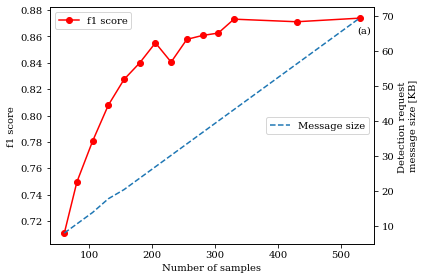

In [11]:
fig, ax1 = plt.subplots()

s1 = ax1.plot([x+30 for x in highest_f1.keys()],
         [x for x in highest_f1.values()], color='red', label='f1 score', marker='o')

ax1.set_xlabel('Number of samples')
ax1.set_ylabel('f1 score')  #, color=s1[0].get_color())

ax1.legend(loc=2)

ax2 = ax1.twinx()

s2 = ax2.plot([x+30 for x in highest_f1.keys()],
         [x/1000/3.1 for x in message_size_stateless], ls='--', label='Message size')

# s3 = ax2.plot([x+30 for x in highest_f1.keys()],
#          [272/1000 for x in message_size_stateless], ls=':', label='Stateful', linewidth=2.8)

ax2.set_ylabel('Detection request \nmessage size [KB]')
ax2.text(ax2.get_xlim()[1]*.95, ax2.get_ylim()[1]*.9, '(a)')

ax2.legend(loc=5)
plt.tight_layout()
for fig_format in figure_formats:
    plt.savefig(f'../figures/f1_score_vs_message_size.{fig_format}')

plt.show()

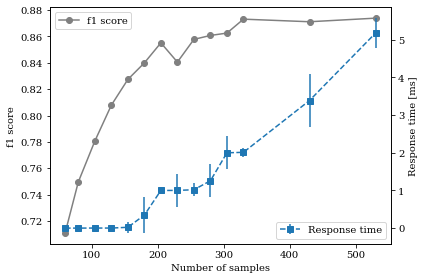

In [6]:
fig, ax1 = plt.subplots()

s1 = ax1.plot([x+30 for x in highest_f1.keys()],
         [x for x in highest_f1.values()], 
         color='gray', label='f1 score', marker='o')

ax1.set_xlabel('Number of samples')
ax1.set_ylabel('f1 score')  #, color=s1[0].get_color())

ax1.legend(loc=2)

ax2 = ax1.twinx()

s2 = ax2.errorbar([x+30 for x in highest_f1.keys()],
         [x for x in avg_response_time_stateless], 
         [x for x in std_response_time_stateless], 
         ls='--', label='Response time', marker='s')

# s3 = ax2.plot([x+30 for x in highest_f1.keys()],
#          [272/1000 for x in message_size_stateless], ls=':', label='Stateful', linewidth=2.8)

ax2.set_ylabel('Response time [ms]')

ax2.legend(loc=4)
plt.tight_layout()
# for fig_format in figure_formats:
#     plt.savefig(f'../figures/f1_score_vs_response_time.{fig_format}')

plt.show()

## Plotting replica vs. response time results

In [7]:
avg_response_time = {}
stdev_response_time = {}
for num_clients in [30, 60, 120, 240, 480, 960]:  #, 1920
    dataframe = pd.read_csv(f'../client/results/results-{num_clients}-1.csv', names=['response', 'ida', 'response_time'])
    for run in range(2, 11):
        # print(f'../client/results/results-{num_clients}-{run}.csv')
        df = pd.read_csv(f'../client/results/results-{num_clients}-{run}.csv')
        dataframe = dataframe.append(df)
    avg_response_time[num_clients] = dataframe['response_time'].mean()
    stdev_response_time[num_clients] = dataframe['response_time'].std()
print('Minimum:', min(avg_response_time.values()))
print('Maximum:', max(avg_response_time.values()))

Minimum: 5.6675775772176475
Maximum: 19.117936829904377


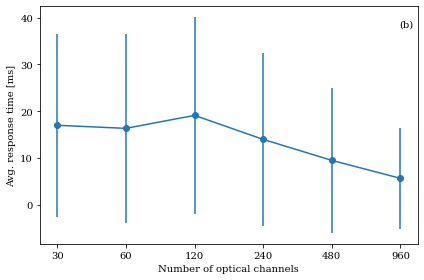

In [8]:
plt.figure()

plt.errorbar(range(len(avg_response_time)), 
            [x for x in avg_response_time.values()], 
            [x for x in stdev_response_time.values()], 
            marker='o')
plt.xticks(range(len(avg_response_time)), [x for x in avg_response_time.keys()])
plt.xlabel('Number of optical channels')
plt.ylabel('Avg. response time [ms]')
plt.text(plt.xlim()[1]*.95, plt.ylim()[1]*.9, '(b)')
plt.tight_layout()
for fig_format in figure_formats:
    plt.savefig(f'../figures/response_time_vs_number_clients.{fig_format}')
plt.show()

In [9]:
replicas_time = pd.read_csv('../client/results/replicas_final_until_960.csv', parse_dates=['time'])
print(replicas_time.head())
start = replicas_time.loc[0]['time']

                 time  utilization  currentreplicas  desiredreplicas
0 2021-10-14 05:11:17            0                2                2
1 2021-10-14 05:11:27            0                2                2
2 2021-10-14 05:11:37            0                2                2
3 2021-10-14 05:11:47            5                2                2
4 2021-10-14 05:11:58            5                2                2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


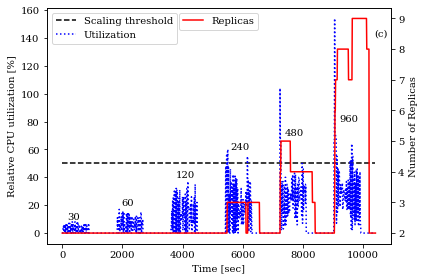

In [10]:
fig, ax1 = plt.subplots()
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            [50 for x in replicas_time['utilization']], 
            label='Scaling threshold', ls='--', color='black')
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            replicas_time['utilization'], 
            label='Utilization', ls=':', color='blue')

text_indices = [30+881-30, 1835+2676-1835, 3619+4481-3619, 5435+6296-5435, 7240+8102-7240, 9036+9898-9036]

y_values = 10,20,40,60,70,80
for idr, num_clients in enumerate([30, 60, 120, 240, 480, 960]):  #, 1920
    plt.text(text_indices[idr]-700, y_values[idr], f'{num_clients}')

plt.xlabel('Time [sec]')
ax1.set_ylabel('Relative CPU utilization [%]')
ax1.legend(loc=2)

ax2 = plt.gca().twinx()
# ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['desiredreplicas'], label='Desired', ls='--', linewidth=2, color='green')
ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['currentreplicas'], label='Replicas', ls='-', color='red')
ax2.legend(loc=9)
ax2.set_ylabel('Number of Replicas')
ax2.text(ax2.get_xlim()[1]*.95, ax2.get_ylim()[1]*.9, '(c)')

plt.tight_layout()
xticks = plt.xticks()
# plt.xticks([(x - start).total_seconds() for x in replicas_time['time']], 
#            [str((x - start)) for x in replicas_time['time']])
for fig_format in figure_formats:
    plt.savefig(f'../figures/load_vs_replicas.{fig_format}')
plt.show()